# Special Extra!!

Getting the best models on the planet to generate an SVG

Inspired by the legendary Simon Willison's Pelican riding a bike test

Key point: this is a very different task to image generation! The model needs to describe the image with lines and shapes.

### This uses OpenRouter.ai so that we easily access the latest models

In [14]:
from dotenv import load_dotenv
from IPython.display import Markdown, display
from datetime import datetime
import time
from revealer import reveal
from openai import AsyncOpenAI
import os
import asyncio
load_dotenv(override=True)

True

In [15]:
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
if OPENROUTER_API_KEY and OPENROUTER_API_KEY.startswith("sk-or-"):
    print("OPENROUTER_API_KEY looks good so far")
else:
    print("OPENROUTER_API_KEY doesn't seem right")

OPENROUTER_API_KEY looks good so far


In [16]:
openrouter = AsyncOpenAI(base_url=OPENROUTER_BASE_URL, api_key=OPENROUTER_API_KEY)

In [17]:
challenge = "A cowboy surfing in the desert"
prompt = f"Generate an SVG of {challenge}. Respond with the SVG only, no code blocks."
messages = [{"role": "user", "content": prompt}]

In [18]:
async def artist(model, effort=None):
    try:
        start = datetime.now()
        
        # 3. Use 'await' for the network call
        response = await openrouter.chat.completions.create(
            model=model, 
            messages=messages, 
            reasoning_effort=effort
        )
        
        result = response.choices[0].message.content
        end = datetime.now()
        elapsed = (end - start).total_seconds()
        heading = f"### {model}\n**Time:** {elapsed // 60:.0f} min {elapsed % 60:.0f} s\n\n"
        
        return heading, result

    except Exception as e:
        print(f"Model {model} failed: {e}")
        heading = f"### {model}\n**Error:** {e}\n\n"
        return heading, None

In [19]:
tasks = [
    artist("openai/gpt-oss-120b"),
    artist("openai/gpt-5-nano", effort="low"),
    artist("deepseek/deepseek-v3.2"),
    artist("moonshotai/kimi-k2-thinking"),
    artist("x-ai/grok-4.1-fast"),
    artist("anthropic/claude-opus-4.5"),
    artist("openai/gpt-5.2", effort="high"),
    artist("google/gemini-3-pro-preview")
]

# 5. Run all tasks concurrently
# In a Jupyter Notebook, you can use 'await' directly at the top level.
print("Generating images concurrently...")
results = await asyncio.gather(*tasks)

/var/folders/r6/w2t_f_rj6hg96dfc09w531q00000gn/T/ipykernel_21238/1490101980.py:1: RuntimeWarning: coroutine 'artist' was never awaited
  tasks = [


Generating images concurrently...


### openai/gpt-oss-120b
**Time:** 0 min 19 s



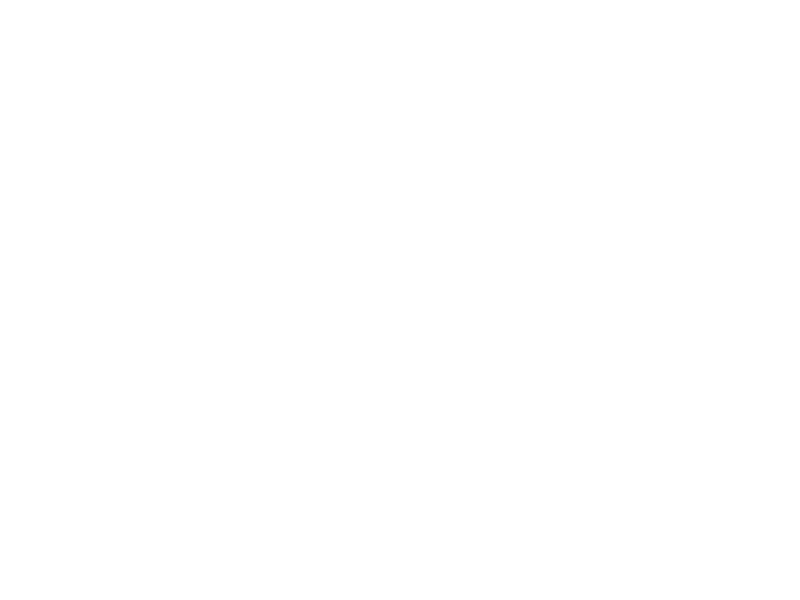

### openai/gpt-5-nano
**Time:** 0 min 11 s



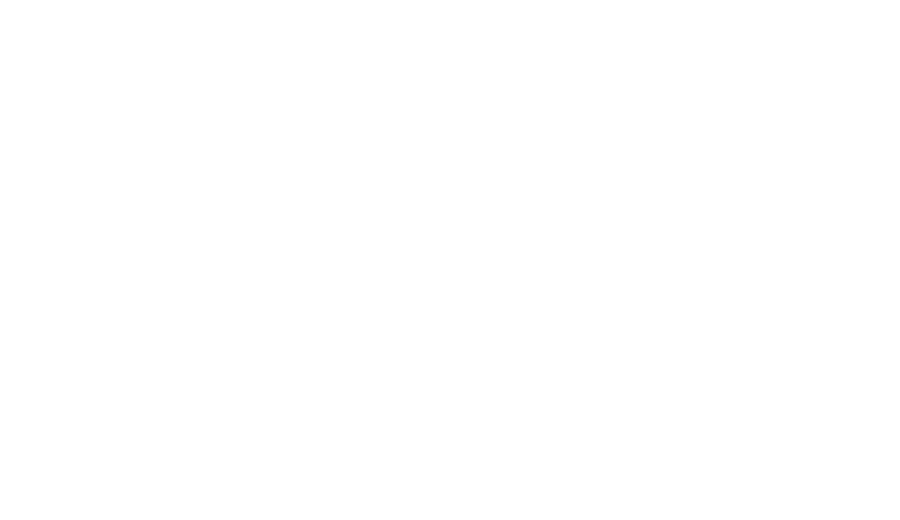

### deepseek/deepseek-v3.2
**Time:** 0 min 55 s



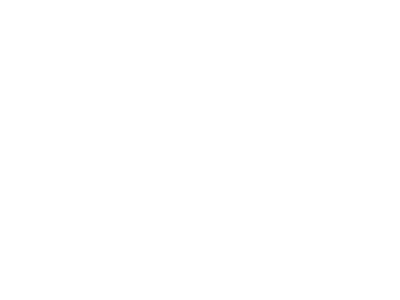

### moonshotai/kimi-k2-thinking
**Time:** 1 min 10 s



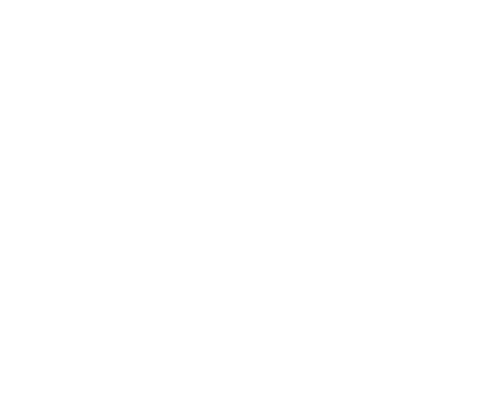

### x-ai/grok-4.1-fast
**Time:** 0 min 18 s



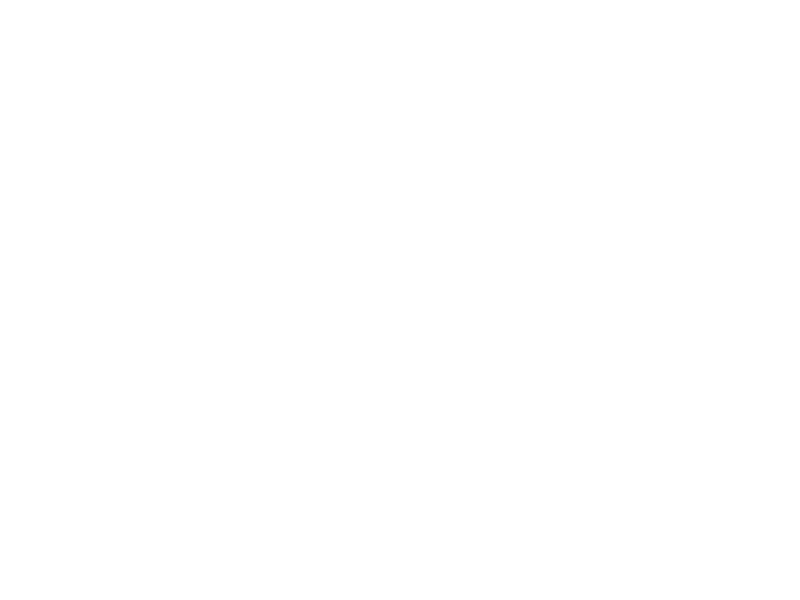

### anthropic/claude-opus-4.5
**Time:** 0 min 17 s



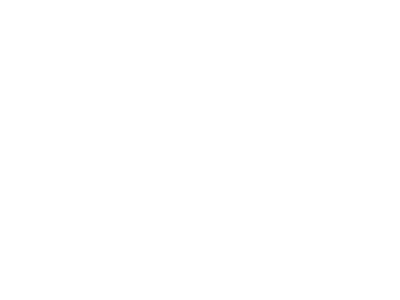

### openai/gpt-5.2
**Time:** 0 min 56 s



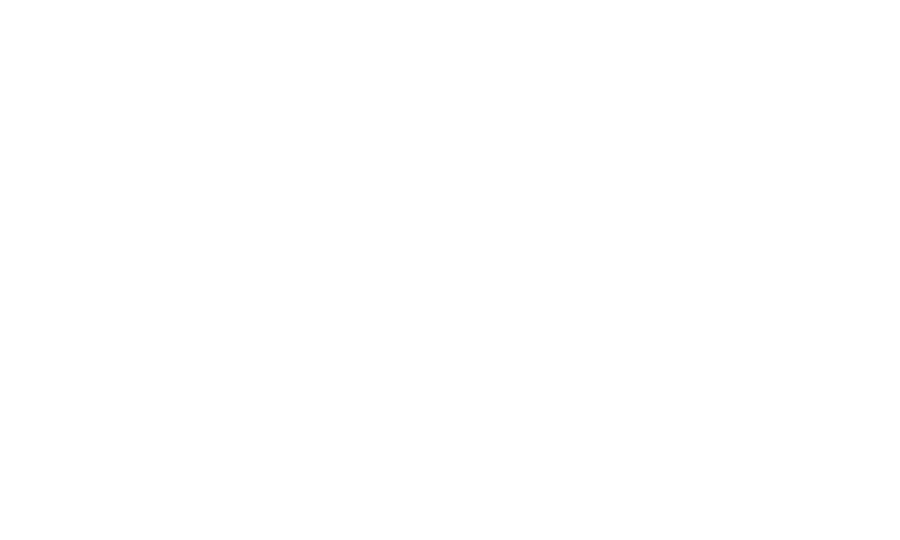

### google/gemini-3-pro-preview
**Time:** 0 min 30 s



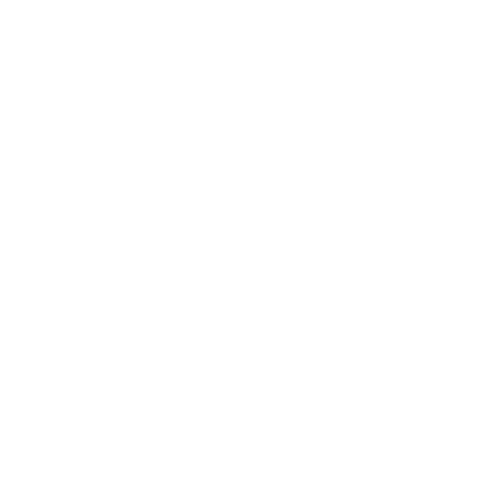

In [20]:
for heading, svg_content in results:
    try:
        if heading:
            display(Markdown(heading))
        if svg_content:
            reveal(svg_content)
    except Exception as e:
        print(f"Error displaying result: {e}")

## In Week 4 we will have more scientific ways to compare models..

but this was quite fun.